# Titanic project

In this project, we are going to explore the famous titanic set, and try to predict if a passenger survived or not.

## Library loading

In [56]:
## Library loading

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import ppscore as pps
import seaborn as sns

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from collections import Counter

warnings.filterwarnings("ignore")

Let's start with loading the train and test files for Titanic dataset.

In [ ]:
## Reading data from file
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Data exploration

To begin with, let's see with what kind of data we are dealing with:

In [7]:
## Basic statistics
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Our target variable is the "Survived" Column, and the rest of the variables contain info about the passengers of Titanic (ticket/fare/sex etc.)

Continuing, we are going to inspect the number of NAs and the percentage per column

In [ ]:
#Number of Nas per column
train.isna().sum()   ## Missing values in Age, Cabin and Embarked

In [ ]:
100*train.isna().mean()   

More than 75% of embarked is missing; we will probably drop the variable.

Siimilarly, for the test set: 

In [ ]:
test.isna().sum()    ## NA in Age and Cabin 

In [ ]:
train.describe()

### Plots

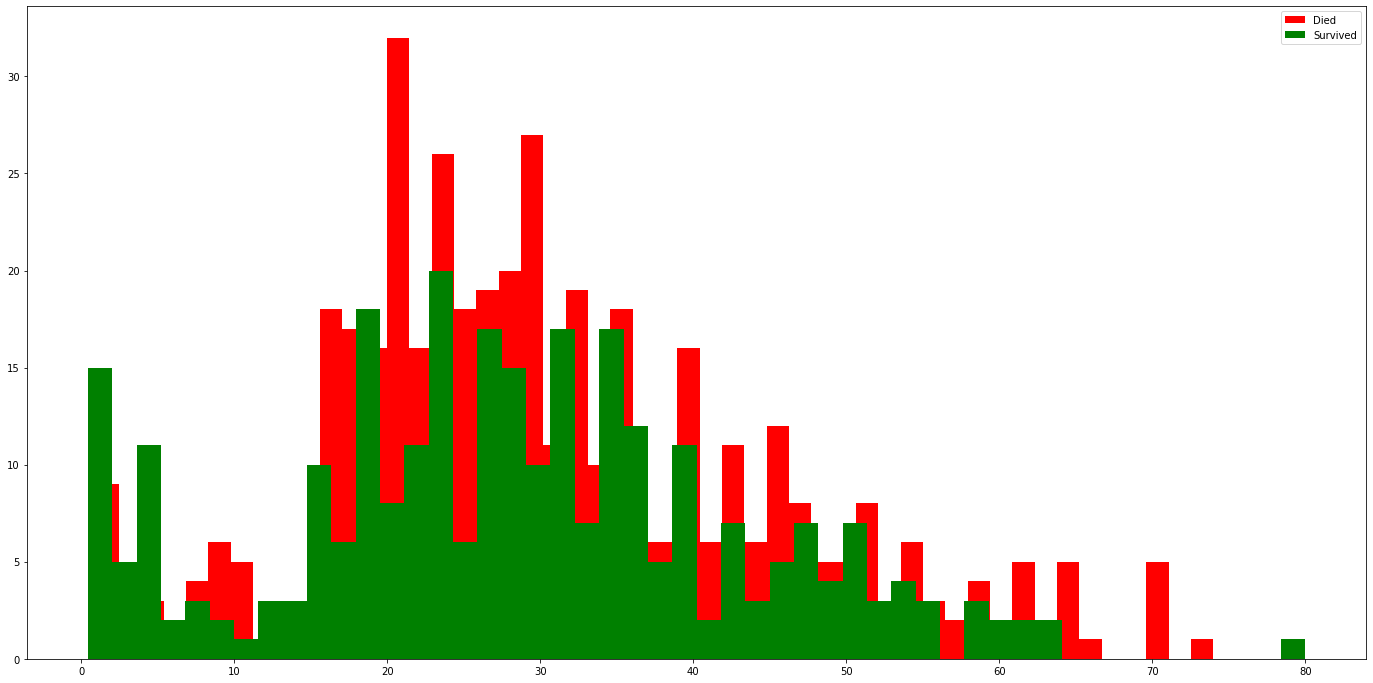

In [20]:
## Basic plots
s0 = train.loc[train.Survived==0,"Age"]
s1 = train.loc[train.Survived==1,"Age"]

plt.figure(figsize=(24,12))
plt.hist(s0,color="red",bins=50,label="Died")
plt.hist(s1,color="green",bins=50,label="Survived")
plt.legend()

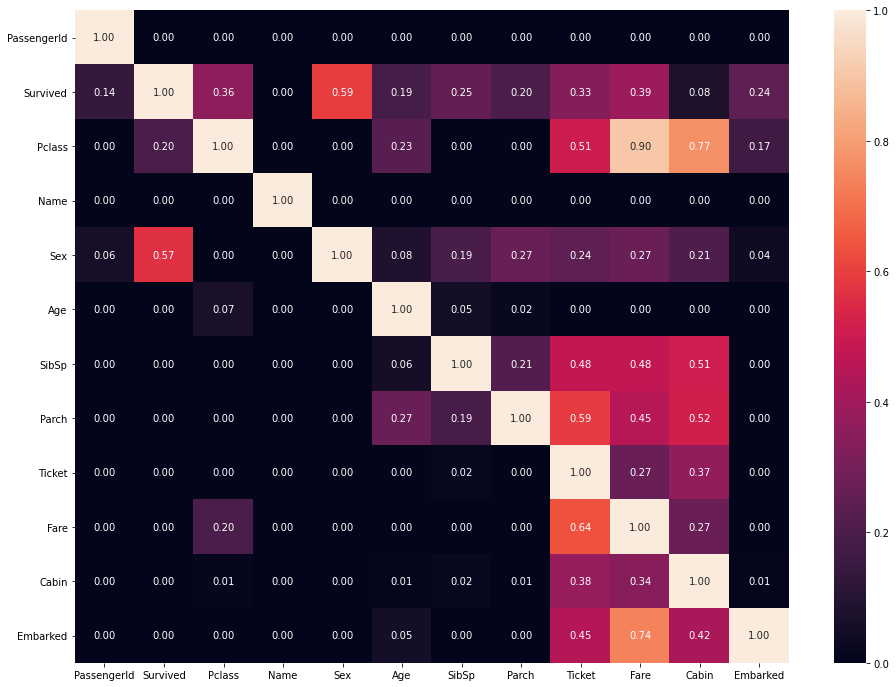

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(pps.matrix(train),annot=True,fmt=".2f")


In [ ]:
Imputating the missing values: Most frequent for categorical data, and mean for the numerical.

In [ ]:
imputer = SimpleImputer()
imputer_cat = SimpleImputer(strategy="most_frequent")
train["Age"] = imputer.fit_transform(train[["Age"]])
train["Embarked"]=imputer_cat.fit_transform(train[["Embarked"]])
train.isna().sum()

In [ ]:
test['Age']=imputer.fit_transform(test[['Age']])
test['Fare']=imputer.fit_transform(test[['Fare']])
test['Sex']=pd.get_dummies(test.Sex)
test.isna().sum()

### Handling outliers

We are going to build a simple function that takes a a data_frame of features and returns the indices of the observations that have outliers. The outliers are calculated based on Tukeys criterion (Distance>1.5 IQR)

In [110]:
def find_outliers (df,n,features):
    """ The function receives as input a data frame df, a number of outliers per observation, 
    and the features we want to test 
    """
    outliers_index = []          #empty list
    
    for col in features:
        outliers=[]
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = (Q3-Q1)
        Trange = 1.5*IQR
    
        
        outliers = (df[(df[col]<Q1-Trange) | (df[col]>Q3+Trange)].index)
        outliers_index.extend(outliers)
    
    lista = Counter(outliers_index)


    multiple_outliers = list( k for k, v in lista.items() if v > n )
    
    
    return multiple_outliers

In [112]:
find_outliers(train,2,["Age","SibSp","Parch","Fare"])

[7,
 16,
 119,
 164,
 268,
 297,
 305,
 386,
 438,
 587,
 642,
 659,
 745,
 824,
 879,
 27,
 88,
 159,
 180,
 201,
 324,
 341,
 792,
 846,
 863]